# Libraries and Packages

In [2]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from PIL import Image

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report,\
f1_score, confusion_matrix, recall_score, silhouette_samples, silhouette_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, PCA, TruncatedSVD


from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from wordcloud import WordCloud

Using TensorFlow backend.


In [23]:
#!export GOOGLE_APPLICATION_CREDENTIALS='../../../../nlp-p4-metis-7cf0c7727460.json'

In [24]:
#run to use google cloud modules
#!pip install --upgrade requests google-cloud-language
#!pip3 install google-cloud-language python-telegram-bot

# Load Data

In [8]:
fashion_df = pd.read_pickle('./data/fashion_df.pkl')

In [9]:
fashion_df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Title_Review_Text,Cleaned_Title_Review_Text,Cleaned_Stemmed_Title_Review_Text
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,high hop dress real want work init ord petit s...,Some major design flaws I had such high hopes ...,major design flaws high hopes dress really wan...,maj design flaw high hop dress real want work ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,favorit buy lov lov lov jumpsuit fun flirty fa...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,flat shirt shirt flat due adjust front tie per...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite feet tall ...,lov tracy rees dress on petit feet tal us wear...,Not for the very petite I love tracy reese dre...,petite love tracy reese dresses one petite fee...,petit lov tracy rees dress on petit feet tal u...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,ad basket hte last mintu see would look lik pe...,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,cagrco shim fun ad basket hte last mintu see w...


In [10]:
fashion_df_lh = pd.DataFrame()


#for ratings 1-3 and 5
# fashion_df_lh = fashion_df.loc[(fashion_df['Rating'] == 1) | (fashion_df['Rating'] == 2) | (fashion_df['Rating'] == 3) | (fashion_df['Rating'] == 5) , ['Cleaned_Review_Text', 'Cleaned_Stemmed_Review_Text', 'Rating']].copy(deep= True)

#for ratings 1 and 5
fashion_df_lh = fashion_df.loc[(fashion_df['Rating'] == 1) |(fashion_df['Rating'] == 5) ,\
                               ['Review_Text','Cleaned_Review_Text', 'Cleaned_Stemmed_Review_Text',\
                                'Rating', 'Title_Review_Text','Cleaned_Title_Review_Text',\
                                'Cleaned_Stemmed_Title_Review_Text']].copy(deep= True)
fashion_df_lh.head()


,Review_Text,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Rating,Title_Review_Text,Cleaned_Title_Review_Text,Cleaned_Stemmed_Title_Review_Text
1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,5,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,favorit buy lov lov lov jumpsuit fun flirty fa...
2,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,5,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,flat shirt shirt flat due adjust front tie per...
4,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,ad basket hte last mintu see would look lik pe...,5,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,cagrco shim fun ad basket hte last mintu see w...
6,I love this dress. i usually get an xs but it ...,love dress usually get xs runs little snug bus...,lov dress us get xs run littl snug bust ord si...,5,Flattering I love this dress. i usually get an...,flattering love dress usually get xs runs litt...,flat lov dress us get xs run littl snug bust o...
7,"I'm 5""5' and 125 lbs. i ordered the s petite t...",lbs ordered petite make sure length long typic...,lbs ord petit mak sur leng long typ wear xs re...,5,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",fun dress lbs ordered petite make sure length ...,fun dress lbs ord petit mak sur leng long typ ...


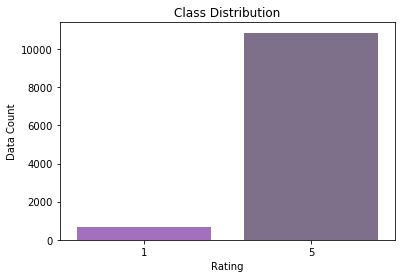

In [39]:
ax = sns.countplot(x=fashion_df_lh['Rating'], palette= ['#a663cc','#7e6b8f'])
ax.set_title('Class Distribution')
ax.set_ylabel('Data Count')

fig = ax.get_figure()
fig.savefig('./class_dist.svg', transparent=True) 

In [11]:
#for ratings 1-3 and 5
# fashion_df_lh.loc[(fashion_df_lh['Rating'] == 1) | (fashion_df_lh['Rating'] == 2) | (fashion_df_lh['Rating'] == 3), 'low_high_rating'] = 'low'
# fashion_df_lh.loc[(fashion_df_lh['Rating'] == 5), 'low_high_rating'] = 'high'


#for ratings 1 and 5
fashion_df_lh.loc[(fashion_df_lh['Rating'] == 1), 'low_high_rating'] = 0
fashion_df_lh.loc[(fashion_df_lh['Rating'] == 5), 'low_high_rating'] = 1
fashion_df_lh['low_high_rating'] = fashion_df_lh['low_high_rating'].astype(int)
fashion_df_lh.reset_index(inplace=True, drop=True)
fashion_df_lh.head()

,Review_Text,Cleaned_Review_Text,Cleaned_Stemmed_Review_Text,Rating,Title_Review_Text,Cleaned_Title_Review_Text,Cleaned_Stemmed_Title_Review_Text,low_high_rating
0,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,lov lov lov jumpsuit fun flirty fab every tim ...,5,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,favorit buy lov lov lov jumpsuit fun flirty fa...,1
1,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flat due adjust front tie perfect leng w...,5,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...,flat shirt shirt flat due adjust front tie per...,1
2,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,ad basket hte last mintu see would look lik pe...,5,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...,cagrco shim fun ad basket hte last mintu see w...,1
3,I love this dress. i usually get an xs but it ...,love dress usually get xs runs little snug bus...,lov dress us get xs run littl snug bust ord si...,5,Flattering I love this dress. i usually get an...,flattering love dress usually get xs runs litt...,flat lov dress us get xs run littl snug bust o...,1
4,"I'm 5""5' and 125 lbs. i ordered the s petite t...",lbs ordered petite make sure length long typic...,lbs ord petit mak sur leng long typ wear xs re...,5,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",fun dress lbs ordered petite make sure length ...,fun dress lbs ord petit mak sur leng long typ ...,1


In [12]:
fashion_df_lh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 8 columns):
Review_Text                          11549 non-null object
Cleaned_Review_Text                  11549 non-null object
Cleaned_Stemmed_Review_Text          11549 non-null object
Rating                               11549 non-null int64
Title_Review_Text                    11549 non-null object
Cleaned_Title_Review_Text            11549 non-null object
Cleaned_Stemmed_Title_Review_Text    11549 non-null object
low_high_rating                      11549 non-null int64
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


In [13]:
X = fashion_df_lh['Cleaned_Title_Review_Text']
X_stemmed = fashion_df_lh['Cleaned_Stemmed_Title_Review_Text']

y = fashion_df_lh['low_high_rating']

In [14]:
X.shape

(11549,)

In [11]:
X_stemmed.shape


(11549,)

In [12]:
y.shape

(11549,)

In [13]:
X_stemmed

0        favorit buy lov lov lov jumpsuit fun flirty fa...
1        flat shirt shirt flat due adjust front tie per...
2        cagrco shim fun ad basket hte last mintu see w...
3        flat lov dress us get xs run littl snug bust o...
4        fun dress lbs ord petit mak sur leng long typ ...
                               ...                        
11544    much bet person ye gre dress sur onlin col com...
11545    unflat surpr posit review produc terr cut weir...
11546    fun piec sur ord skirt see person first glad s...
11547    gre dress many occas happy snag dress gre pric...
11548    pleas mak lik on dress lov platin feminin fit ...
Name: Cleaned_Stemmed_Title_Review_Text, Length: 11549, dtype: object

In [14]:
X

0        favorite buy love love love jumpsuit fun flirt...
1        flattering shirt shirt flattering due adjustab...
2        cagrcoal shimmer fun aded basket hte last mint...
3        flattering love dress usually get xs runs litt...
4        fun dress lbs ordered petite make sure length ...
                               ...                        
11544    much better person yes great dress sure online...
11545    unflattering surprised positive reviews produc...
11546    fun piece sure ordering skirt see person first...
11547    great dress many occasions happy snag dress gr...
11548    please make like one dress lovely platinum fem...
Name: Cleaned_Title_Review_Text, Length: 11549, dtype: object

# Sentiment Analysis

## Google

In [246]:
#client = language.LanguageServiceClient(credentials=credentials)

In [248]:
# def get_sentiment_score(review, client):
#     #client = language.LanguageServiceClient(credentials=credentials)

#     document = types\
#                .Document(content=review,
#                          type=enums.Document.Type.PLAIN_TEXT)
#     sentiment_score = client\
#                       .analyze_sentiment(document=document)\
#                       .document_sentiment\
#                       .score
#     return sentiment_score

In [ ]:
# sentiment = []
# for review in X:
#     sentiment.append(get_sentiment_score(review))

In [ ]:
# status = np.array([len(sentiment) * [0]])
# for sent in sentiment:
#     if sent <= -0.25:
#         status = 'NEGATIVE'
#     elif sent <= 0.25:
#         status = 'NEUTRAL'
#     else:
#         status = 'POSITIVE'

# Train Test Split

In [15]:
#non stemmed data
X_to_split, X_test, y_to_split, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = \
train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=42)



In [16]:
#stemmed data
X_to_split_stem, X_test_stem, y_to_split_stem, y_test_stem = \
train_test_split(X_stemmed, y, test_size=0.3, random_state=42)

X_train_stem, X_val_stem, y_train_stem, y_val_stem = \
train_test_split(X_to_split_stem, y_to_split_stem, test_size=0.3,\
                 random_state=42)



In [17]:
pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('tfidf', TfidfVectorizer()),
    ('reduce_dim', 'passthrough'),
    ('smote',SMOTE()),
    ('classify', LogisticRegression())
])

N_FEATURES_OPTIONS = list(range(10,109, 10))
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [ NMF(), TruncatedSVD()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    }
]
reducer_labels = ['NMF', 'LSA']

grid = GridSearchCV(pipe, cv=10, n_jobs=1, param_grid=param_grid, iid=False, scoring='f1_weighted')

In [18]:
grid.fit(X,y)
# lsa and nmf make f1 worse, so remove from supervised learning

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                        

In [22]:
grid.best_score_

0.9510888318488352

In [23]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('classify',
                 LogisticRegression(C=1000, class_weight=None, dual=False,
                                    fit_in

# Sentiment Analysis (Classification)

In [177]:
tfidf_vect2 = TfidfVectorizer(ngram_range=(1, 2),\
                              max_df = .6, max_features=5000,\
                              analyzer='word', stop_words= 'english')

In [24]:

cnb = ComplementNB()
lr = LogisticRegression()
tfidf = TfidfVectorizer()
smote = SMOTE()

pipeline = Pipeline([('vect', tfidf),('smote', smote),('classifier', lr)])
pipeline_bayes = Pipeline([('vect', tfidf),('smote', smote),('classifier', cnb)])

In [179]:
def threshold_curve(pipe, X_cv, y_cv):
    pred_y=pipe.predict(X_cv) 

    probs_y=pipe.predict_proba(X_cv) 
      # probs_y is a 2-D array of probability of being labeled as 0 (first 
      #column of 
      #array) vs 1 (2nd column in array)

   #retrieve probability of being 1(in second column of probs_y)
    precision, recall, thresholds = precision_recall_curve(y_cv, probs_y[:, 
    1]) 
    
    #retrieve probability of being 0(in first column of probs_y)
    precision_0, recall_0, thresholds_0 = precision_recall_curve(y_cv, probs_y[:, 
    0]) 
       
    
    print(roc_auc_score(y_cv, pred_y))
   

    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision_1")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall_1")
    plt.plot(thresholds_0, precision_0[: -1], "g--", label="Precision_0")
    plt.plot(thresholds_0, recall_0[: -1], "y--", label="Recall_0")

    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])

In [180]:
def auc_roc_curve(pipe, testX, testy):
    ns_probs = [0 for _ in range(len(testy))] #ns_probs
    
    lr_probs = pipe.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [181]:
scores = cross_val_score(pipeline,X_train,y_train, cv=10, scoring='f1_macro')
scores

/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

array([0.86652542, 0.89290445, 0.91274613, 0.91738432, 0.93741707,
       0.84772666, 0.908636  , 0.91273641, 0.89967081, 0.92176249])

In [26]:
scores = cross_val_score(pipeline_bayes,X_train,y_train, cv=10, scoring='f1_macro')
scores

array([0.86652542, 0.88716108, 0.91738432, 0.89794078, 0.89968233,
       0.87227038, 0.88134172, 0.90611499, 0.85917248, 0.89616152])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.989


/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


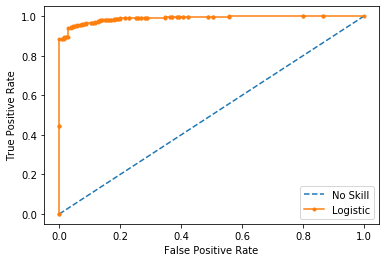

0.9034725253407051


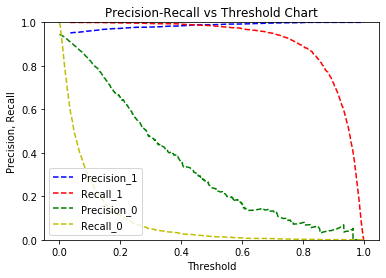

In [182]:
pipe=pipeline.fit(X_train, y_train)
auc_roc_curve(pipe, X_val, y_val)
threshold_curve(pipe, X_val, y_val)


In [183]:
preds_proba = pipe.predict_proba(X_val)
threshold = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]


In [184]:
for t in threshold:
    print(f'{t}:')
    preds = (preds_proba[:,1] >= t).astype(int)
    print(recall_score(y_val, preds, average='binary', pos_label=0))
    print(classification_report(y_val, preds))

0.05:
0.17777777777777778
              precision    recall  f1-score   support

           0       0.96      0.18      0.30       135
           1       0.95      1.00      0.98      2291

    accuracy                           0.95      2426
   macro avg       0.96      0.59      0.64      2426
weighted avg       0.95      0.95      0.94      2426

0.1:
0.3037037037037037
              precision    recall  f1-score   support

           0       0.95      0.30      0.46       135
           1       0.96      1.00      0.98      2291

    accuracy                           0.96      2426
   macro avg       0.96      0.65      0.72      2426
weighted avg       0.96      0.96      0.95      2426

0.15:
0.4444444444444444
              precision    recall  f1-score   support

           0       0.95      0.44      0.61       135
           1       0.97      1.00      0.98      2291

    accuracy                           0.97      2426
   macro avg       0.96      0.72      0.79      2426

In [185]:
for t in threshold:
    preds = (preds_proba[:,0] <= t).astype(int)
    print(f'{t}:')
    print(classification_report(y_val, preds))

0.05:
              precision    recall  f1-score   support

           0       0.11      1.00      0.19       135
           1       1.00      0.51      0.67      2291

    accuracy                           0.54      2426
   macro avg       0.55      0.75      0.43      2426
weighted avg       0.95      0.54      0.65      2426

0.1:
              precision    recall  f1-score   support

           0       0.17      1.00      0.30       135
           1       1.00      0.72      0.84      2291

    accuracy                           0.74      2426
   macro avg       0.59      0.86      0.57      2426
weighted avg       0.95      0.74      0.81      2426

0.15:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       135
           1       1.00      0.83      0.91      2291

    accuracy                           0.84      2426
   macro avg       0.63      0.92      0.66      2426
weighted avg       0.96      0.84      0.88      2426

0.

In [202]:
preds = (preds_proba[:,1] >= .7).astype(int)
print(classification_report(y_val, preds))
f1_score(y_val, preds, average='weighted')

              precision    recall  f1-score   support

           0       0.53      0.95      0.68       135
           1       1.00      0.95      0.97      2291

    accuracy                           0.95      2426
   macro avg       0.76      0.95      0.82      2426
weighted avg       0.97      0.95      0.96      2426



0.9562885670262139

In [203]:
confusion_matrix(y_val, preds)

array([[ 128,    7],
       [ 115, 2176]])

In [204]:
preds_proba_test = pipe.predict_proba(X_test)
preds_test = (preds_proba_test[:,1] >= .7).astype(int)
f1_score(y_test, preds_test, average='weighted')


0.9527329442318666

In [205]:
confusion_matrix(y_test, preds_test)

array([[ 194,   15],
       [ 172, 3084]])

In [206]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.53      0.93      0.67       209
           1       1.00      0.95      0.97      3256

    accuracy                           0.95      3465
   macro avg       0.76      0.94      0.82      3465
weighted avg       0.97      0.95      0.95      3465



In [98]:
X_test

10029    love turquoise print absolutely stunning love ...
5259     amazing feeling defeated search dress upcoming...
8526     well made another keeper top beautiful well ma...
2701                        cute skirt dying skirt picture
3315     absolutely love received denim joggers first p...
                               ...                        
8557     perfect tee versatile soft well made washes dr...
266      great top purchased top great sale fits great ...
1108     fun wear absolutely love jacket bought wore wo...
8852     great material love lilac purple color breatha...
10458    great look love pants also ordered blue great ...
Name: Cleaned_Title_Review_Text, Length: 3465, dtype: object

In [106]:
X_test_df = pd.DataFrame()


In [107]:
X_test_df['Cleaned_Title_Review_Text'] = X_test#, preds_test)
X_test_df['low_high_rating'] = preds_test
X_test_df.reset_index(inplace=True, drop=True)
X_test_df

,Cleaned_Title_Review_Text,low_high_rating
0,love turquoise print absolutely stunning love ...,1
1,amazing feeling defeated search dress upcoming...,1
2,well made another keeper top beautiful well ma...,1
3,cute skirt dying skirt picture,1
4,absolutely love received denim joggers first p...,1
...,...,...
3460,perfect tee versatile soft well made washes dr...,1
3461,great top purchased top great sale fits great ...,1
3462,fun wear absolutely love jacket bought wore wo...,1
3463,great material love lilac purple color breatha...,1


In [108]:
X_test_low_df = X_test_df.loc[X_test_df['low_high_rating'] == 0, :]
X_test_low_df.reset_index(inplace=True, drop=True)

In [109]:
X_test_low_df
X_low_df = X_test_low_df

In [257]:
# -        NO . Yes
# - actual| Tn| Fp
#         | Fn| Tp
# -       |___|______
# -predicted
# -
# -Tn = actual low reviews
# -Fn = predicted low but actually high reviews
# -Tp = actual high reviews
# -Fp = predicted high but actually low reviews

# WordCloud

In [149]:
X_low_df = fashion_df_lh.loc[fashion_df_lh['low_high_rating'] == 0, ['Cleaned_Title_Review_Text', 'low_high_rating']]
X_low_df.reset_index(inplace=True, drop=True)

In [150]:
X_low_df

,Cleaned_Title_Review_Text,low_high_rating
0,itchy tags tags sewn small long huge x itchy c...,0
1,huge excited order top red xs cute huge shapel...,0
2,poor quality thin poor quality especially pric...,0
3,scratchy uncomfortable top title says fabric t...,0
4,pictured skirt received little blue green most...,0
...,...,...
686,looks great poor quality pants overpriced unco...,0
687,cute poor quality ordered large fit arms awkwa...,0
688,big disappointment loved print fabric dress fi...,0
689,disappointed excited find fun lightweight whit...,0


In [151]:
remove_words = ['dress','like', 'person', 'retailer', 'sweater', 'pants', 'shirt', 'blouse', 'shorts', 'online', 'ordered', 'really', 'review']
pattern = [f'(\\b{word}\\b)' for word in remove_words]
pattern = '|'.join(pattern)

X_low_df['Cleaned_Title_Review_Text'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [152]:
cv_wc = CountVectorizer(ngram_range=(2, 3),\
                                   stop_words='english',\
                                   max_df = 0.6,\
                                   max_features=5000)
cv_reviews = cv_wc.fit_transform(X_low_df['Cleaned_Title_Review_Text'])

tfidf_wc = TfidfVectorizer(ngram_range=(2, 3),\
                                   stop_words='english',\
                                   max_df = 0.6,\
                                   max_features=5000)
tfidf_reviews = tfidf_wc.fit_transform(X_low_df['Cleaned_Title_Review_Text'])

In [153]:
wc_feat_names = tfidf_wc.get_feature_names()

sum_words = tfidf_reviews.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_wc.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [154]:
words_freq_words = [words[0] for words in words_freq]
words_freq_words

['poor quality',
 'wanted love',
 'high hopes',
 'size small',
 'way big',
 'looks cute',
 'look good',
 'looks cheap',
 'usually wear',
 'quality material',
 'worth money',
 'runs large',
 'felt cheap',
 'cold water',
 'fabric stiff',
 'true size',
 'usual size',
 'poor fit',
 'looks great',
 'feels cheap',
 'runs small',
 'worth price',
 'body type',
 'tried store',
 'read reviews',
 'make look',
 'odd fit',
 'short waisted',
 'potato sack',
 'fabric felt',
 'fabric quality',
 'weird fit',
 'makes look',
 'cute design',
 'small small',
 'fit looked',
 'fabric looks',
 'wear small',
 'dry cleaned',
 'excited receive',
 'gentle cycle',
 'wear size',
 'quality fabric',
 'unfortunately going',
 'agree reviewer',
 'fabric fabric',
 'look cheap',
 'good fit',
 'super itchy',
 'quality poor',
 'material nice',
 'chest area',
 'horrible fit',
 'great quality',
 'looks maternity',
 'love design',
 'look huge',
 'size large',
 'material soft',
 'disappointed quality',
 'extra fabric',
 'cheap 

In [155]:
words_freq

[('poor quality', 7.384642898404615),
 ('wanted love', 7.2832109007801),
 ('high hopes', 4.186057481922714),
 ('size small', 3.948561683088279),
 ('way big', 3.548210537826502),
 ('looks cute', 3.334181990866563),
 ('look good', 3.2930222172056625),
 ('looks cheap', 3.100841364623981),
 ('usually wear', 3.0223537493434027),
 ('quality material', 2.977008331857626),
 ('worth money', 2.8688766078672963),
 ('runs large', 2.851464099802004),
 ('felt cheap', 2.831236930683432),
 ('cold water', 2.5532666932700128),
 ('fabric stiff', 2.538755674131705),
 ('true size', 2.5197001261805982),
 ('usual size', 2.5093059908654562),
 ('poor fit', 2.4333435210637657),
 ('looks great', 2.3779687415012947),
 ('feels cheap', 2.3711660331148163),
 ('runs small', 2.331884199535028),
 ('worth price', 2.2369981589275754),
 ('body type', 2.212432621328091),
 ('tried store', 2.1662226993206106),
 ('read reviews', 2.1604250731734758),
 ('make look', 2.0953610888125227),
 ('odd fit', 2.0442874469636143),
 ('shor

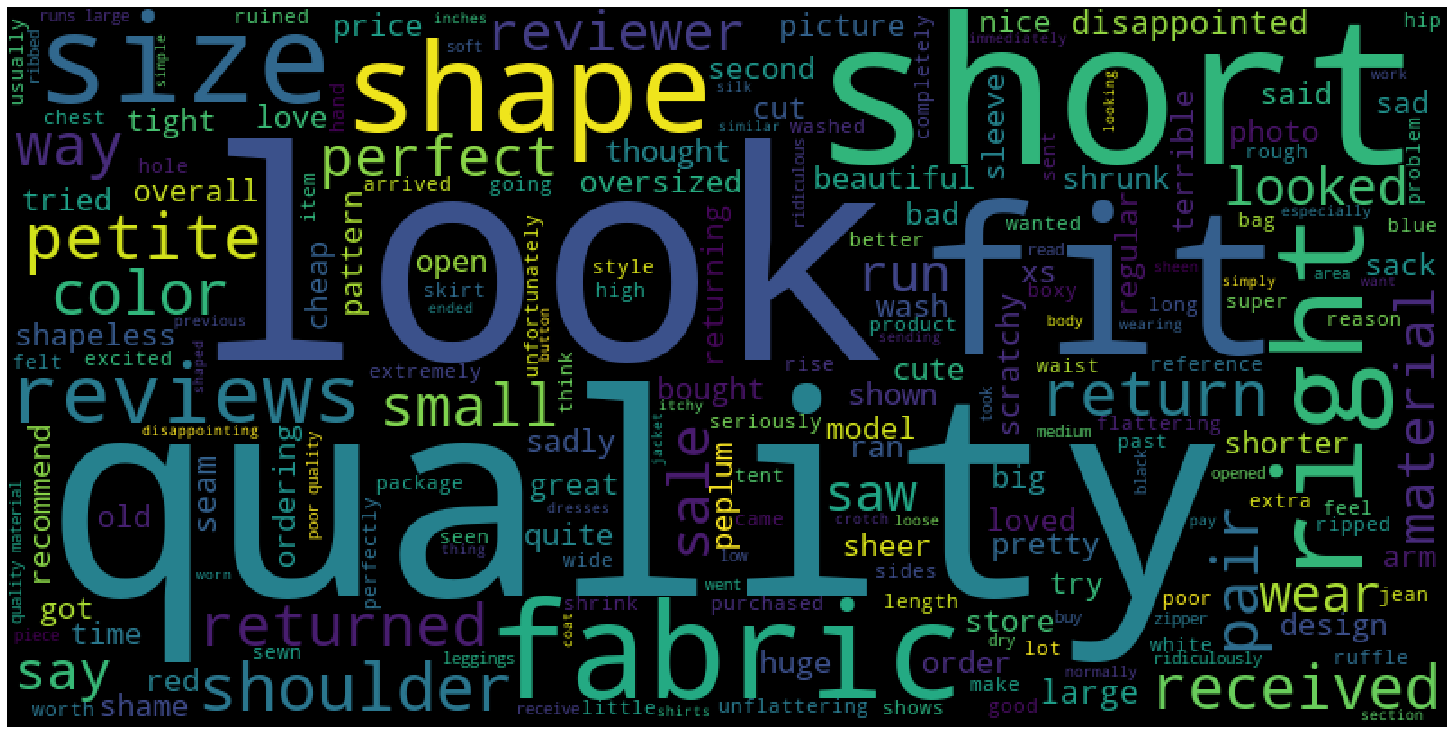

In [156]:
wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(' '.join(wc_feat_names))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

In [157]:
wc_feat_names

['abdomen seriously',
 'able return',
 'able wear',
 'absolutely loved',
 'absolutely shape',
 'according care',
 'according care instructions',
 'according directions',
 'actually thought',
 'addition fabric',
 'adds pounds',
 'ag stevie',
 'agree previous',
 'agree previous reviewer',
 'agree reviewer',
 'agree reviewers',
 'air dry',
 'apart loved',
 'appears model',
 'appears photo',
 'arm holes',
 'arm holes low',
 'arm ruffles',
 'arms chest',
 'arms fit',
 'arms shoulder',
 'arms sides',
 'arms tight',
 'arrived disappointed',
 'arrived mail',
 'arrived material',
 'arrived today',
 'arrived tried',
 'arrived wrinkled',
 'awful awful',
 'awful bought',
 'awful fabric',
 'bad construction',
 'bad fabric',
 'bad fit',
 'bad nice',
 'bad quality',
 'bad reviews',
 'bad shape',
 'bad wanted',
 'bag got',
 'base color',
 'based photos',
 'based reviews',
 'beading neckline',
 'beautiful design',
 'beautiful design poor',
 'beautiful excited',
 'beautiful fabric',
 'beautiful material

In [158]:
dress_mask = np.array(Image.open("./dress.jpg"))
dress_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

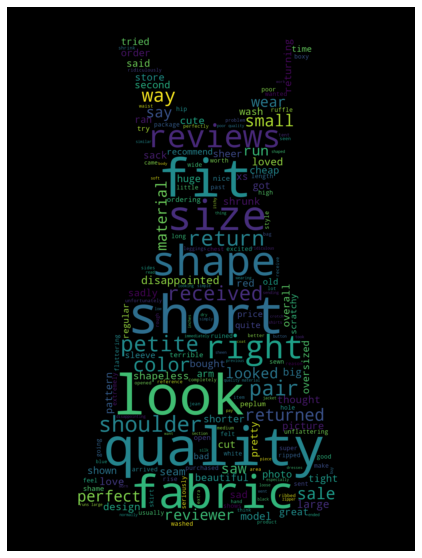

In [166]:
wc = WordCloud( mask=dress_mask,\
               contour_width=3)

# Generate a wordcloud
wc.generate((' '.join(wc_feat_names)))
wc.to_file("wc.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Topic Modeling

In [167]:
smote= SMOTE(random_state=42)
lr = LogisticRegression(random_state=42)

In [168]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [137]:
def print_topics(n_comp_list,cv_wc, tfidf_wc, cv_reveiws, tfidf_reviews):
    for n_comp in n_comp_list:
        lsa_tfidf = TruncatedSVD(n_components=n_comp)
        lsa_cv = TruncatedSVD(n_components=n_comp)
        nmf_tfidf = NMF(n_components=n_comp)
        nmf_cv = NMF(n_components=n_comp)

        lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_reviews)
        print('\nlsa_tfidf:')
        print(display_topics(lsa_tfidf, tfidf_wc.get_feature_names(),5))
        
        lsa_cv_data = lsa_cv.fit_transform(cv_reviews)
        print('\nlsa_cv:')
        print(display_topics(lsa_cv, cv_wc.get_feature_names(),5))
        
        nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_reviews)
        print('\nnmf_tfidf:')
        print(display_topics(nmf_tfidf, tfidf_wc.get_feature_names(),5))
        
        nmf_cv_data = nmf_cv.fit_transform(cv_reviews)
        print('\nnmf_cv:')
        print(display_topics(nmf_cv, cv_wc.get_feature_names(),5))

In [138]:
n_comp_list = range(5,15, 5)

In [207]:
print_topics([4], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, worth money, poor quality material, returned poor quality

Topic  2
way big, fabric stiff, size small, runs way big, runs way

Topic  3
looks cheap, cheap returned, looks cheap returned, cheap looking, worth money
None

lsa_cv:

Topic  0
poor quality, quality material, poor quality material, wanted love, quality fabric

Topic  1
wanted love, size small, cold water, usually wear, fit great

Topic  2
cold water, flat dry, washed cold, washed cold water, wore washed

Topic  3
bought pair, spots leg, light spots leg, came light spots, came light
None

nmf_tfidf:

Topic  0
wanted love, high hopes, cut wide, poor fit, runs small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor

Topic  2
way big, runs way big, runs way, fabric stiff, size small

Topic  3
looks cheap, felt cheap, cheap returned, looks cheap returned, looked felt c

In [208]:
print_topics([5], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, poor quality material, worth money, cute design

Topic  2
way big, size small, usual size, runs way big, runs way

Topic  3
looks cheap, felt cheap, looks cheap returned, looked felt, looked felt cheap

Topic  4
cold water, high hopes, wore washed, flat dry, washed according
None

lsa_cv:

Topic  0
poor quality, quality material, poor quality material, wanted love, quality fabric

Topic  1
size small, wanted love, cold water, usually wear, usual size

Topic  2
cold water, flat dry, washed cold, washed cold water, wore washed

Topic  3
bought pair, light spots leg, light spots, spots leg, came light

Topic  4
size small, wanted love, small petite, big size, fit great
None

nmf_tfidf:

Topic  0
wanted love, high hopes, cut wide, poor fit, runs small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor

Topic  2
way big, runs way

In [209]:
print_topics([10], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, cut wide

Topic  1
poor quality, quality material, poor quality material, returned poor quality, returned poor

Topic  2
way big, runs way, runs way big, fabric stiff, looks great

Topic  3
looks cheap, felt cheap, looks cheap returned, cheap returned, fabric felt

Topic  4
cold water, flat dry, wore washed, washed according, wore washed according

Topic  5
felt cheap, fabric felt, fabric felt cheap, way big, looked felt cheap

Topic  6
true size, fit true size, fit true, love design, wanted love

Topic  7
looks cheap, cheap returned, looks cheap returned, cheap looking, way big

Topic  8
look good, runs large, worth money, size small, material nice

Topic  9
feels cheap, looks feels, looks feels cheap, high hopes, look good
None

lsa_cv:

Topic  0
poor quality, quality material, poor quality material, wanted love, quality fabric

Topic  1
size small, wanted love, cold water, usually wear, flat dry

Topic  2
cold wat

In [210]:
print_topics([20], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor

Topic  2
way big, size small, runs way, runs way big, looks cheap

Topic  3
looks cheap, felt cheap, looks cheap returned, cheap returned, looked felt cheap

Topic  4
cold water, flat dry, wore washed, washed according, wore washed according

Topic  5
true size, fit true, fit true size, short waisted, look good

Topic  6
true size, fit true size, fit true, looks cheap, short waisted

Topic  7
felt cheap, fabric felt, fabric felt cheap, looked felt, looked felt cheap

Topic  8
look good, worth money, material nice, quality material, feels cheap

Topic  9
feels cheap, looks feels, looks feels cheap, worth money, looks cute

Topic  10
looks cute, super itchy, cute model, looks cute model, fabric looks

Topic  11
feels cheap, body type, poor fit, looks feels, looks feels cheap

Topic  12
quality material, poor fit, gre

In [211]:
print_topics([30], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor quality

Topic  2
way big, runs way, runs way big, fabric stiff, size small

Topic  3
cold water, looks cheap, flat dry, felt cheap, wore washed

Topic  4
looks cheap, felt cheap, cheap returned, looks cheap returned, cheap looking

Topic  5
true size, fit true, fit true size, short waisted, love design

Topic  6
looks cheap, wanted love, cheap returned, looks cheap returned, fabric looks

Topic  7
felt cheap, true size, fabric felt, fit true, fit true size

Topic  8
high hopes, fabric stiff, true size, body type, looks cheap

Topic  9
feels cheap, looks feels, looks feels cheap, body type, poor fit

Topic  10
feels cheap, look good, looks feels, looks feels cheap, fabric stiff

Topic  11
body type, poor fit, cute design, usual size, size small

Topic  12
usually wear, body type, cute design, gentle cycle, poor fit


In [212]:
print_topics([40], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor

Topic  2
way big, fabric stiff, runs way big, runs way, size small

Topic  3
cold water, flat dry, wore washed, washed according, wore washed according

Topic  4
looks cheap, felt cheap, cheap returned, looks cheap returned, looked felt cheap

Topic  5
true size, look good, fit true, fit true size, short waisted

Topic  6
felt cheap, high hopes, look good, fabric felt, fabric felt cheap

Topic  7
true size, fit true size, fit true, short waisted, felt cheap

Topic  8
high hopes, looks cheap, fabric stiff, body type, cheap returned

Topic  9
feels cheap, looks feels, looks feels cheap, high hopes, way tight

Topic  10
looks cute, cute model, looks cute model, super itchy, way boxy

Topic  11
look good, feels cheap, looks feels, looks feels cheap, horrible fit

Topic  12
body type, poor fit, cute design, quality mate


nmf_cv:

Topic  0
poor quality, poor quality material, big disappointment, fabric poor, fabric poor quality

Topic  1
size small, big size, big size small, small petite, bad reviews

Topic  2
cold water, washed cold, flat dry, washed cold water, dry shrunk

Topic  3
bought pair, light spots leg, light spots, spots leg, came light spots

Topic  4
usually wear, wear size, usually wear size, xs tops, size xs

Topic  5
wanted love, cut wide, love saw, wanted love saw, better hanger

Topic  6
looks cute, cute model, looks cute model, feet inches, inches tall

Topic  7
shrinks shrinks, steel blue, local store, dry clean, wash instructions

Topic  8
inner lining, read reviews, wish read, wish read reviews, lay flat

Topic  9
coat lambswool, lambswool acrylic, coat lambswool acrylic, original version, high price

Topic  10
looks old, looks great, great pictures, looks great pictures, reviewer said

Topic  11
washing cold, washing cold water, cold water, usual size, hand washing

Topic  12
sal

In [215]:
nmf_cv = NMF(n_components=40)
nmf_cv_data = nmf_cv.fit_transform(cv_reviews)
print('\nnmf_cv:')
print(display_topics(nmf_cv, cv_wc.get_feature_names(),5))


nmf_cv:

Topic  0
poor quality, poor quality material, big disappointment, fabric poor quality, fabric poor

Topic  1
size small, big size, big size small, small petite, fit great

Topic  2
cold water, flat dry, wore washed, delicate cold, delicate cold water

Topic  3
bought pair, came light spots, light spots, came light, spots leg

Topic  4
usually wear, wear size, usually wear size, xs tops, size xs

Topic  5
wanted love, cut wide, odd fit, better hanger, love saw

Topic  6
looks cute, cute model, looks cute model, feet inches tall, feet inches

Topic  7
steel blue, shrinks shrinks, local store, dry clean, wash instructions

Topic  8
inner lining, read reviews, wish read, wish read reviews, lay flat

Topic  9
coat lambswool, lambswool acrylic, original version, coat lambswool acrylic, high price

Topic  10
looks old, looks great, great pictures, looks great pictures, reviewer said

Topic  11
washing cold water, washing cold, cold water, hand washing, hand washing cold

Topic  12
s

In [213]:
print_topics([50], cv_wc, tfidf_wc, cv_reviews, tfidf_reviews)


lsa_tfidf:

Topic  0
wanted love, high hopes, poor quality, way big, size small

Topic  1
poor quality, quality material, poor quality material, worth money, returned poor quality

Topic  2
way big, fabric stiff, runs way, runs way big, size small

Topic  3
cold water, flat dry, wore washed, washed according, wore washed according

Topic  4
looks cheap, felt cheap, looks cheap returned, cheap returned, looked felt

Topic  5
true size, fit true size, fit true, look good, short waisted

Topic  6
looks cheap, wanted love, cheap returned, looks cheap returned, true size

Topic  7
felt cheap, true size, fit true size, fit true, fabric felt

Topic  8
high hopes, fabric stiff, true size, looks cheap, fit true size

Topic  9
looks cute, feels cheap, cute model, looks cute model, super itchy

Topic  10
feels cheap, high hopes, looks feels, looks feels cheap, worth money

Topic  11
look good, feels cheap, looks feels, looks feels cheap, wanted love

Topic  12
usually wear, fabric stiff, look go


nmf_cv:

Topic  0
poor quality, poor quality material, big disappointment, fabric poor, fabric poor quality

Topic  1
size small, big size, big size small, small petite, fit great

Topic  2
cold water, flat dry, wore washed, delicate cold water, delicate cold

Topic  3
bought pair, light spots leg, spots leg, came light spots, light spots

Topic  4
usually wear, wear size, usually wear size, xs tops, size xs tops

Topic  5
wanted love, cut wide, wanted love saw, love saw, better hanger

Topic  6
looks cute, cute model, looks cute model, feet inches tall, inches tall

Topic  7
shrinks shrinks, steel blue, local store, dry clean, shrinks wash

Topic  8
inner lining, read reviews, wish read, wish read reviews, lay flat

Topic  9
coat lambswool, lambswool acrylic, original version, coat lambswool acrylic, high price

Topic  10
looks old, looks great, great pictures, looks great pictures, reviewer said

Topic  11
washing cold, washing cold water, cold water, hand washing, hand washing cold

In [527]:
cv_wc = CountVectorizer(ngram_range=(2, 3),\
                                   stop_words='english',\
                                   max_df = 0.6,\
                                   max_features=5000)
cv_reviews = cv_wc.fit_transform(X_low_df['Cleaned_Title_Review_Text'])
nmf_cv = NMF(n_components=10)
nmf_cv_data = nmf_cv.fit_transform(cv_reviews)
nmf_cv_data_ss = StandardScaler().fit_transform(nmf_cv_data)
        #print('\nnmf_cv:')
        #print(display_topics(nmf_cv, cv_wc.get_feature_names(),5))

In [424]:
X_low_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 2 columns):
Cleaned_Title_Review_Text    691 non-null object
low_high_rating              691 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.9+ KB


In [427]:
np.sum(lda.transform(docu_term_matrix),axis=1)

array([1.93938683e-001, 2.97695492e-002, 6.22926623e-001, 5.80724046e-001,
       7.79602329e-002, 3.33869366e-001, 7.14488887e-001, 1.84035280e+000,
       8.71670565e-001, 5.82579951e-001, 2.14586082e-001, 4.86242992e-001,
       4.35518093e-001, 6.24286986e-002, 3.60031392e-003, 6.78737285e-002,
       1.99282009e-001, 2.15980003e-002, 1.84405059e-029, 6.46384363e-003,
       1.58835506e-001, 9.85752649e-001, 6.57338100e-001, 7.49990888e-001,
       1.47254157e-002, 2.20909489e-001, 7.54504142e-001, 2.42649037e-002,
       3.17945217e-001, 1.05915669e-002, 5.25940998e-001, 2.19755263e-002,
       1.34198051e-002, 1.05852128e-001, 3.22594083e-001, 1.97931538e-001,
       4.38703936e-001, 3.93469411e-002, 4.76454318e-001, 2.13783067e-001,
       2.75448074e-123, 4.60965535e-002, 6.82409651e-001, 1.41662431e-001,
       5.20575838e-002, 4.73730465e-001, 2.73793787e-001, 0.00000000e+000,
       3.23106481e-001, 8.34085507e-002, 2.60014035e-001, 4.27661079e-001,
       8.63836045e-002, 7

In [498]:
#code modified from sklearn example
def silhouette_inertia_k_means(X, range_n_clusters, range_n_clusters_inertia):
    #range_n_clusters = [2, 3, 4, 5, 6]
    sil_coefs = []
    inertia = []
    
    for n_clusters in range_n_clusters_inertia:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)
    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        sil_coefs.append(silhouette_score(X, cluster_labels, metric='euclidean'))
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return(sil_coefs, inertia)

In [499]:
def print_sil_coef_chart(sil_coefs, range_n_clusters):
    plt.plot(range_n_clusters, sil_coefs)
    plt.xlabel('# of clusters')
    plt.ylabel('silhouette coefficient')
    

In [514]:
def print_inertia(inertia, range_n_clusters):
    plt.plot(range_n_clusters, inertia)
    plt.xlabel('# of clusters')
    plt.ylabel('inertia scores')

For n_clusters = 2 The average silhouette_score is : 0.9031002485059282
For n_clusters = 3 The average silhouette_score is : 0.9032189928881806
For n_clusters = 4 The average silhouette_score is : 0.9031012342066627
For n_clusters = 5 The average silhouette_score is : 0.6399578243089764
For n_clusters = 6 The average silhouette_score is : 0.6724844889147484
For n_clusters = 7 The average silhouette_score is : 0.6711771237810965
For n_clusters = 8 The average silhouette_score is : 0.6945013241583572
For n_clusters = 9 The average silhouette_score is : 0.7158299362131821
For n_clusters = 10 The average silhouette_score is : 0.7446616320957001
For n_clusters = 11 The average silhouette_score is : 0.7604751423132291
For n_clusters = 12 The average silhouette_score is : 0.7630327301455444
For n_clusters = 13 The average silhouette_score is : 0.7469643127705392
For n_clusters = 14 The average silhouette_score is : 0.7713127153777367


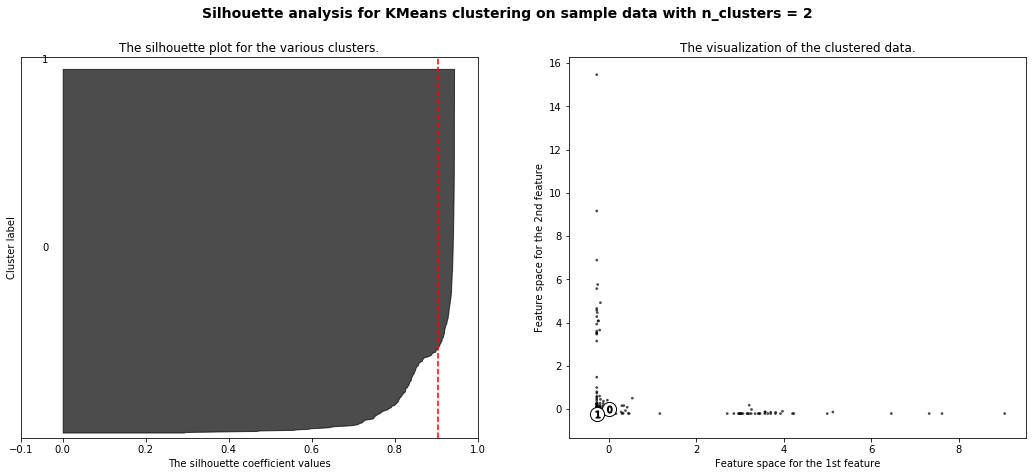

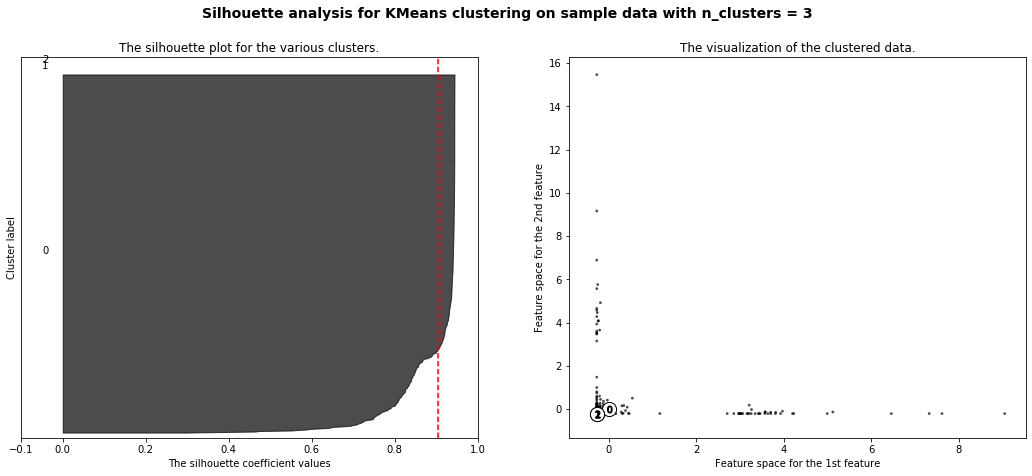

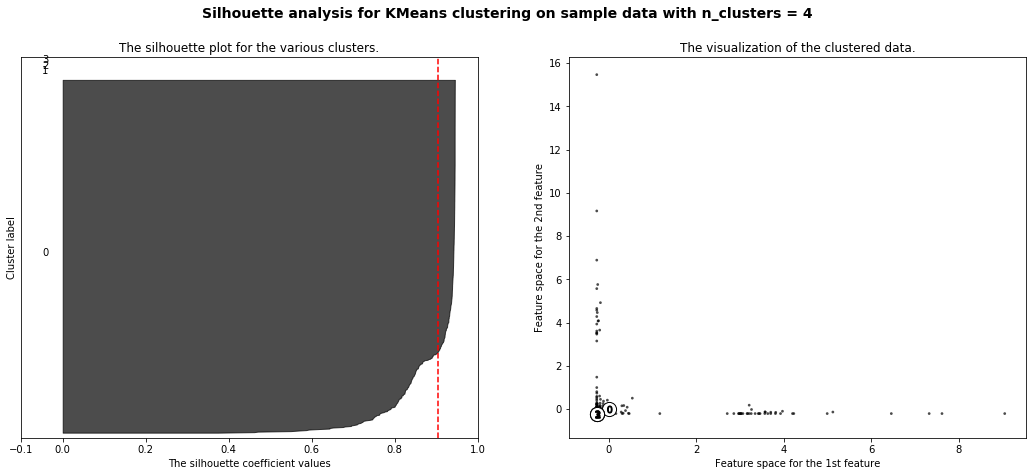

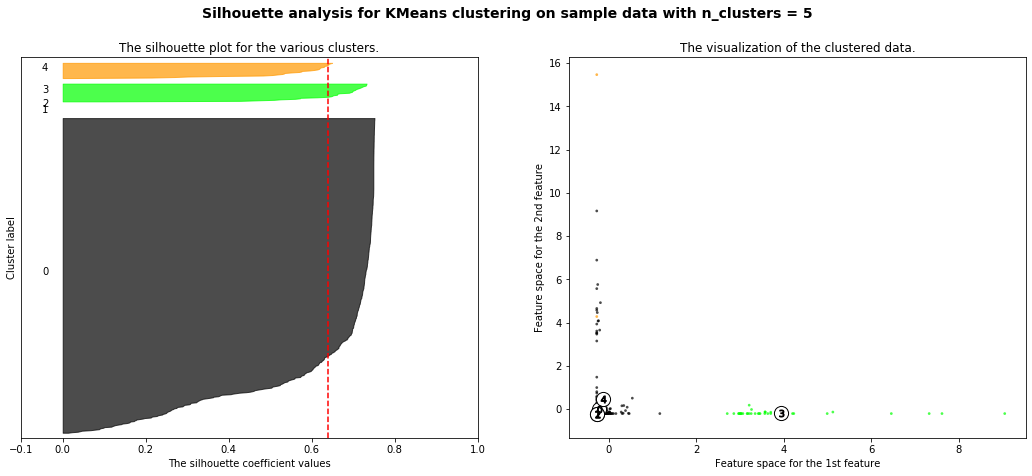

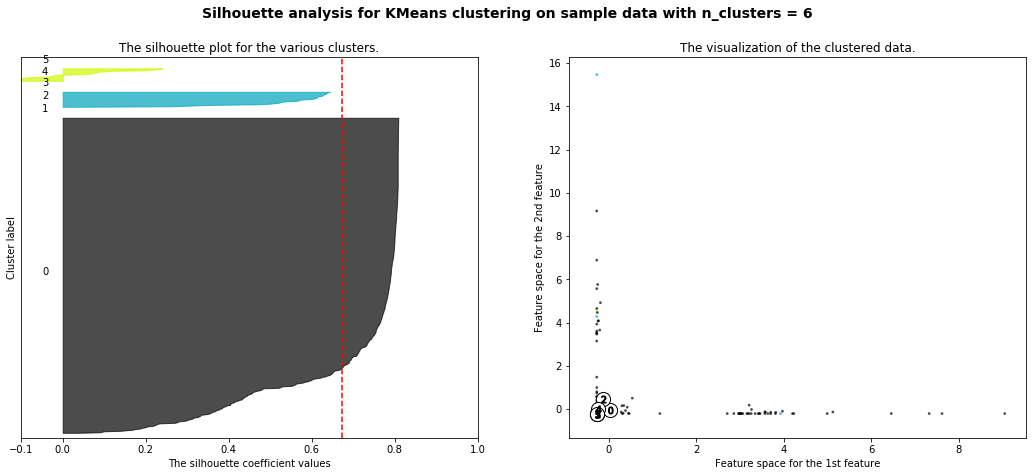

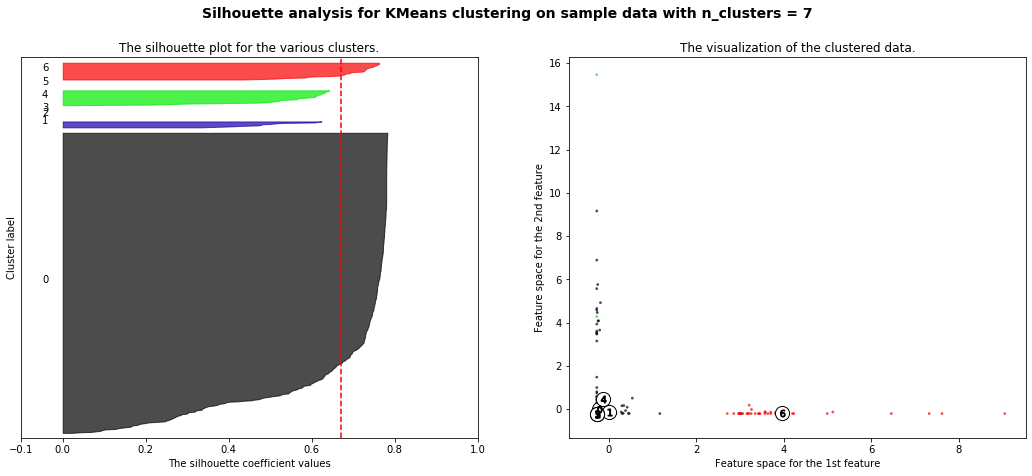

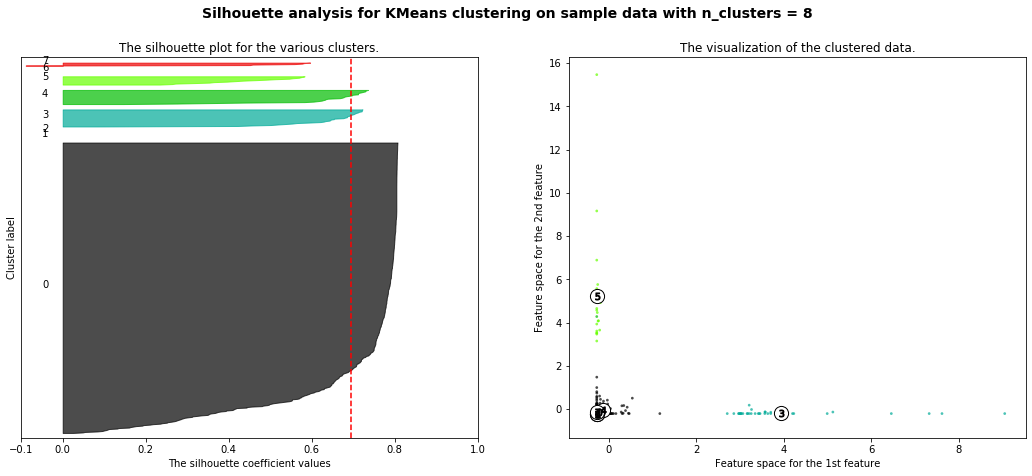

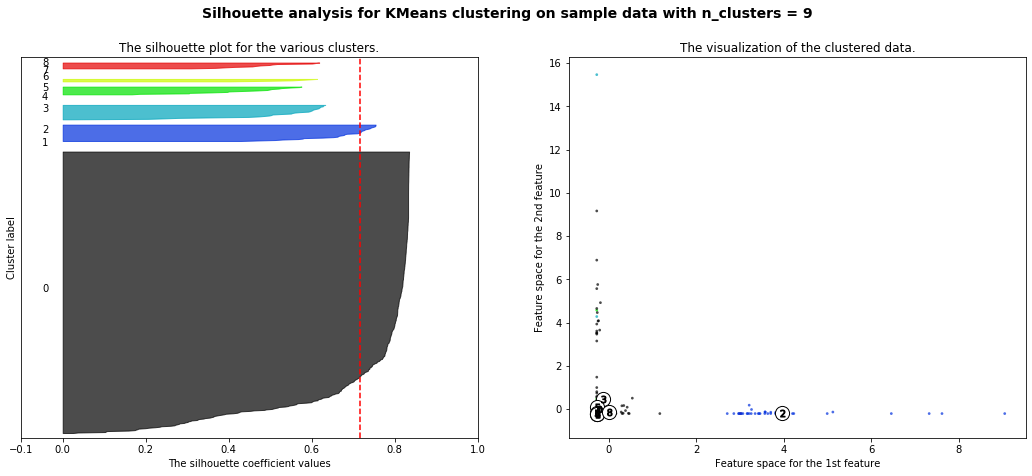

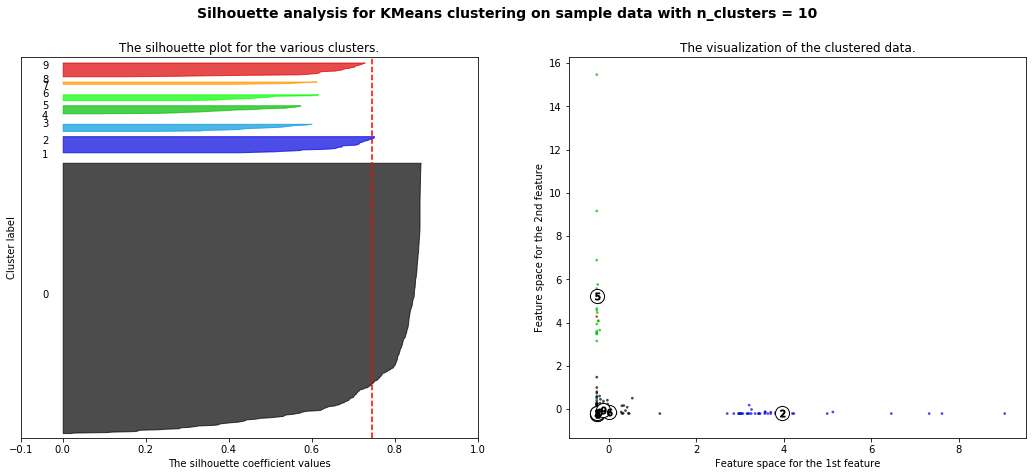

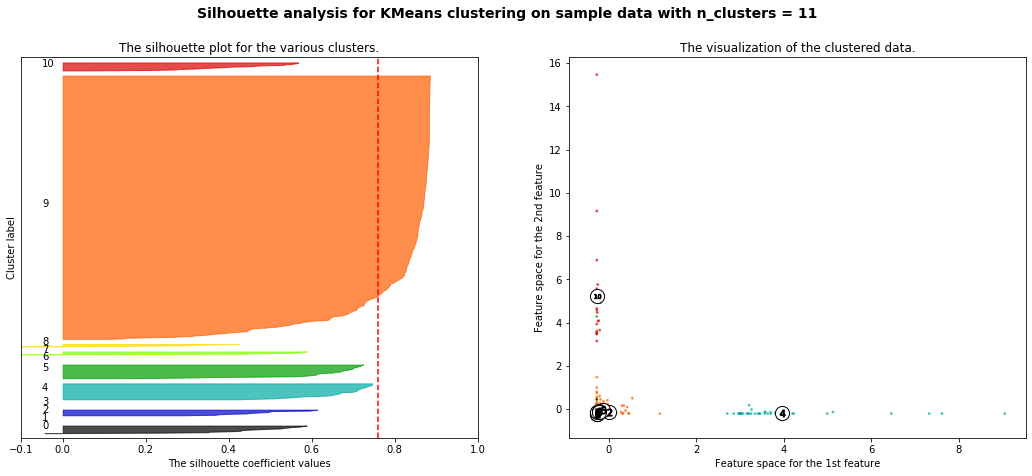

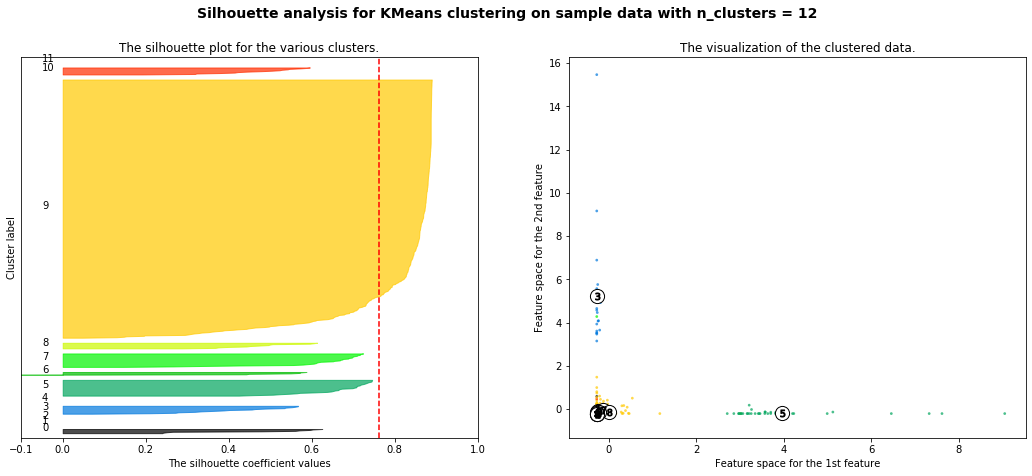

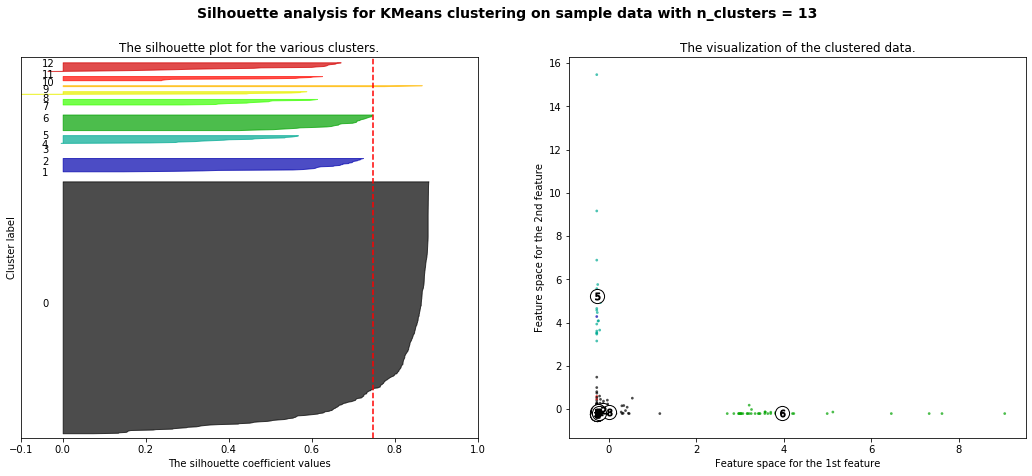

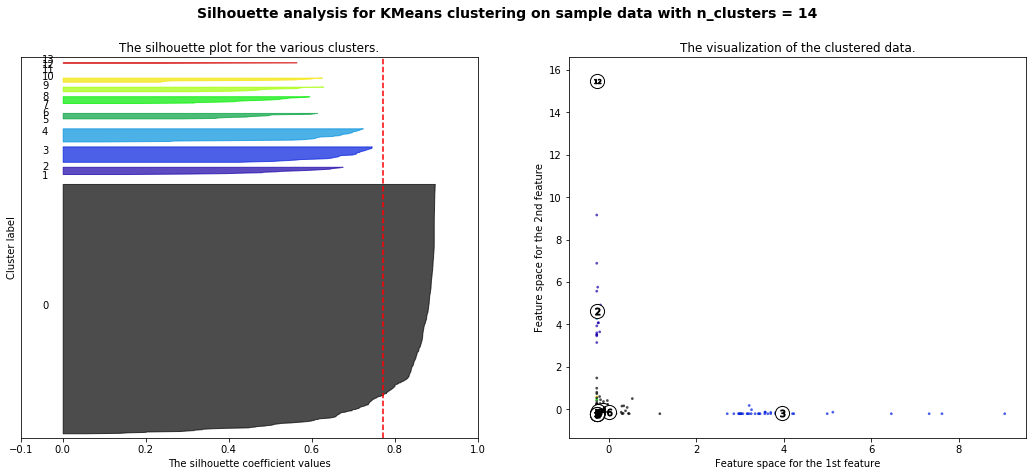

In [533]:
sil_coefs, inertia = silhouette_inertia_k_means(nmf_cv_data_ss, range(2,15), range(2,50))


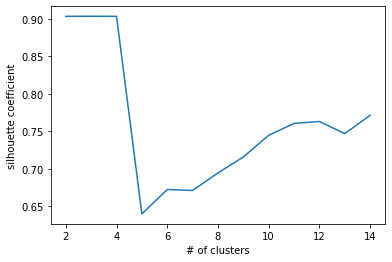

In [534]:
print_sil_coef_chart(sil_coefs, range(2,15))

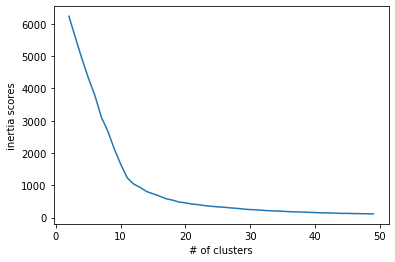

In [530]:
print_inertia(inertia , range(2,50))

In [531]:
inertia

[6238.367114497825,
 5576.395990314901,
 4927.237137139661,
 4326.1885821034075,
 3788.2903053811915,
 3116.415024018028,
 2679.0644562795464,
 2127.833955427529,
 1651.2145619071289,
 1230.735837463246,
 1037.2495968398482,
 931.0027841314129,
 805.0875361912106,
 735.3278345596809,
 662.5873538115204,
 581.9524874363278,
 538.1881993151169,
 479.3103330877576,
 453.34329506347694,
 417.26602889608216,
 398.1509272404521,
 367.4251249076441,
 347.4759614840241,
 328.50302063440716,
 317.2730545507638,
 296.59732376842487,
 283.2176828783243,
 259.9575196840493,
 246.15459800655333,
 237.3210571277157,
 221.46860536368854,
 209.0446751995334,
 200.79862318794684,
 192.7885725894766,
 181.6193845230817,
 173.76506420039692,
 169.72749101527856,
 161.26540586389618,
 152.94628591111962,
 145.60204391261095,
 142.84292439629618,
 137.93449110843645,
 127.63528785228709,
 127.98943339282575,
 121.30328787690661,
 118.98681699621957,
 115.86797481950788,
 111.16926964456454]

11


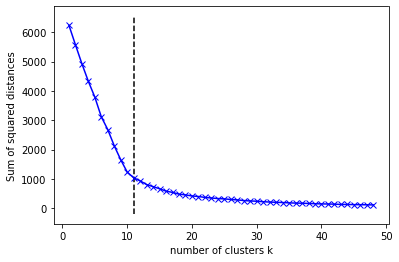

In [532]:
x = range(1, len(inertia)+1)

from kneed import KneeLocator
kn = KneeLocator(x, inertia, curve='convex', direction='decreasing')
print(kn.knee)
5

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [548]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(nmf_cv_data_ss)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = cv_wc.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['absolutely shape', 'according care', 'abdomen seriously', 'able return', 'able wear', 'according care instructions', 'actually thought', 'addition fabric', 'absolutely loved', 'according directions']
cluster1:
['absolutely loved', 'according directions', 'addition fabric', 'actually thought', 'according care instructions', 'able wear', 'able return', 'abdomen seriously', 'according care', 'absolutely shape']
cluster2:
['according directions', 'addition fabric', 'absolutely loved', 'actually thought', 'according care instructions', 'able wear', 'able return', 'abdomen seriously', 'according care', 'absolutely shape']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 691 samples in 0.001s...
[t-SNE] Computed neighbors for 691 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 691 / 691
[t-SNE] Mean sigma: 0.038426
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.539852
[t-SNE] KL divergence after 300 iterations: 0.450816


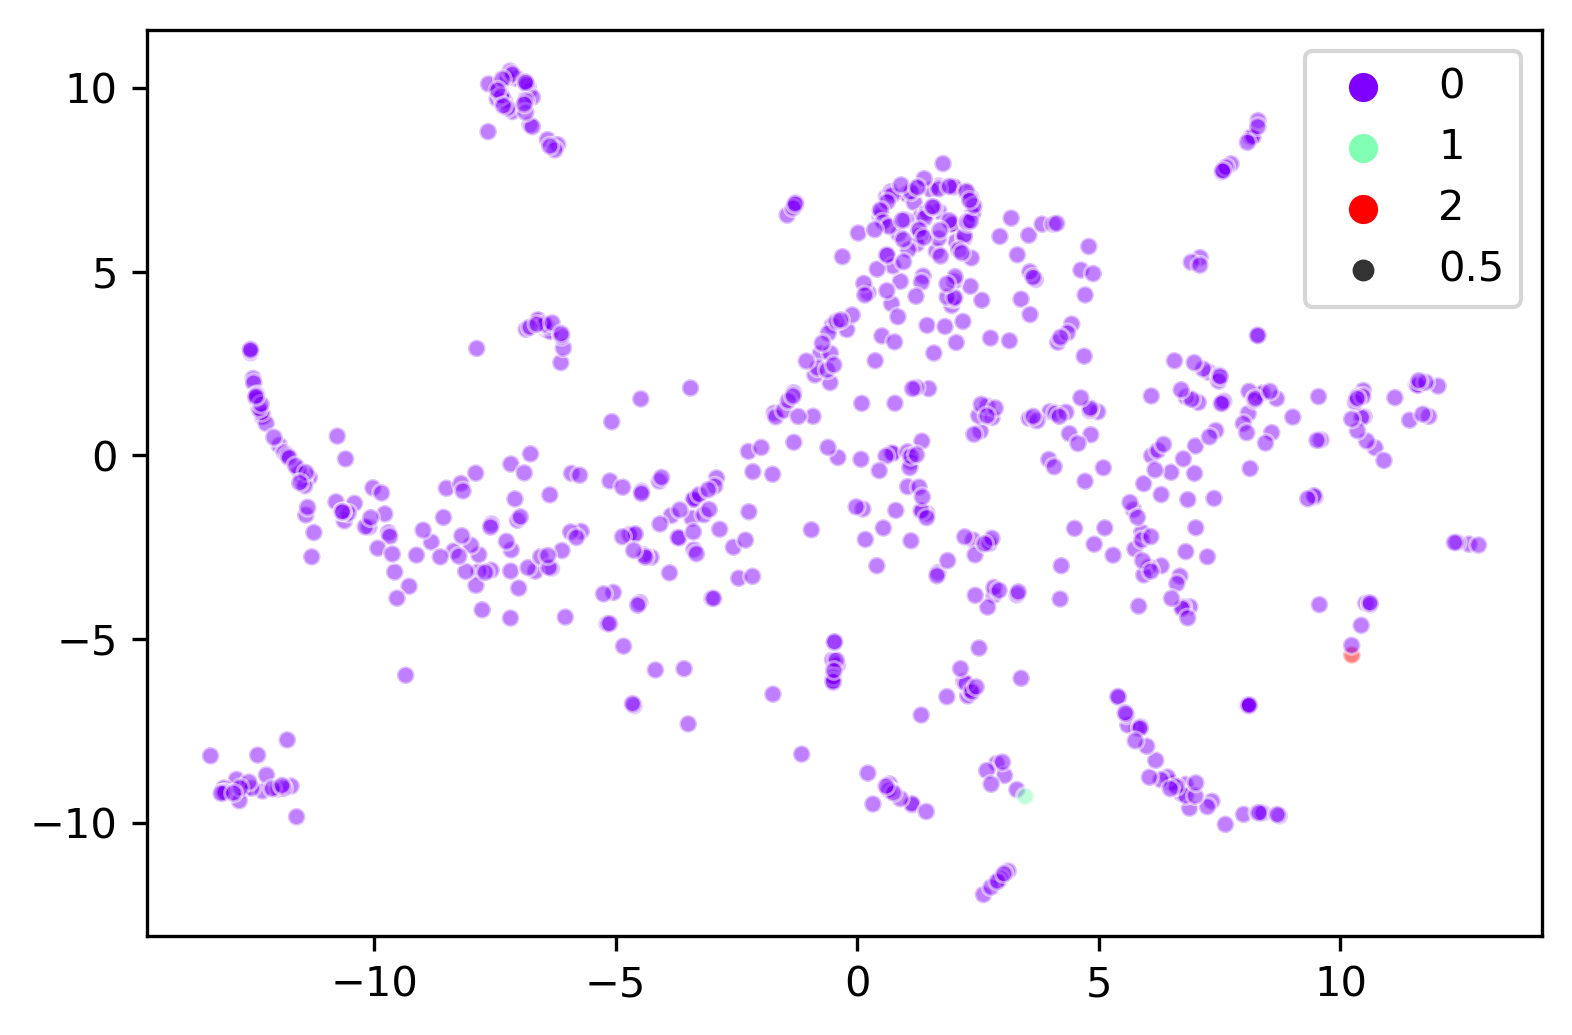

In [549]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_cv_data_ss)

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_, alpha=0.5, size = 0.5, palette='rainbow', legend='full');